In [1025]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1026]:
import matplotlib.pyplot as plt
import torch

In [1027]:
import bnn.network
import bnn.functions

In [1028]:
dims = [32]*5 + [64]*10 + [128]*10 + [64]*10 + [32]*5
dims = [d*2 for d in dims]
TBNN = bnn.network.TernBinNetwork(*dims, bit_shift=3)

In [1029]:
input = bnn.functions.binarise.apply(torch.randn(1, dims[0]))

In [1030]:
output = TBNN(input)

In [1031]:
output.shape

torch.Size([1, 64])

In [1032]:
loss = output.sum()

In [1033]:
loss.backward()

In [1034]:
vars = [] 
grad_vars = []

for layer in TBNN.layers:
    vars.append(layer.W.var().detach())
    grad_vars.append(layer.W.grad.var().detach())

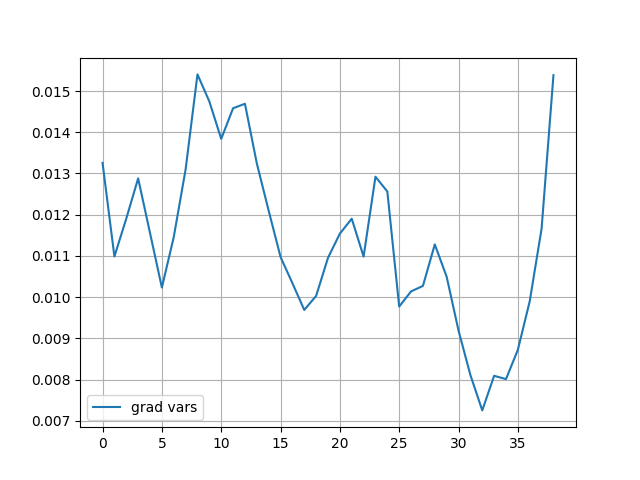

In [1035]:
plt.close()
#plt.plot(vars, label="vars")
plt.plot(grad_vars, label="grad vars")
plt.legend()
plt.grid()
plt.show()